In [1]:
import fastbook

In [2]:
fastbook.setup_book()

In [3]:
from fastai.vision.all import *
from fastbook import *

In [4]:
matplotlib.rc('image', cmap='Greys')

In [5]:
URLs.MNIST

'https://s3.amazonaws.com/fast-ai-imageclas/mnist_png.tgz'

In [6]:
path = untar_data(URLs.MNIST)

In [7]:
Path.BASE_PATH = path

In [8]:
path.ls()

(#2) [Path('testing'),Path('training')]

In [9]:
def get_dls(bs=64):
    return DataBlock(
        blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
        get_items=get_image_files,
        splitter=GrandparentSplitter('training','testing'),
        get_y=parent_label,
        batch_tfms=Normalize()
    ).dataloaders(path, bs=bs)

dls = get_dls()

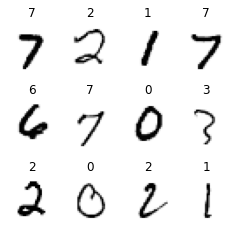

In [10]:
dls.show_batch(max_n=12, figsize=(4,4))

In [11]:
def conv(ni, nf, ks=3, act=True):
    res = nn.Conv2d(ni, nf, stride=2, kernel_size=ks, padding=ks//2)
    if act: res = nn.Sequential(res, nn.ReLU())
    return res

In [12]:
def simple_cnn():
    return sequential(
        conv(1, 8, ks=5),
        conv(8, 16),
        conv(16, 32),
        conv(32, 64),
        conv(64, 10, act=False),
        Flatten(),
    )

In [13]:
from fastai.callback.hook import *

In [62]:
def fit(epochs=1):
    learn = Learner(dls, simple_cnn(),
                   metrics=accuracy, cbs=ActivationStats(with_hist=True))
    learn.fit(epochs, 0.06)
    return learn


In [18]:
learn = fit()

/home/debian/.local/lib/python3.9/site-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (modules) that exists in the learner. Use `self.learn.modules` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


epoch,train_loss,valid_loss,accuracy,time
0,2.305346,2.309673,0.103200,00:51


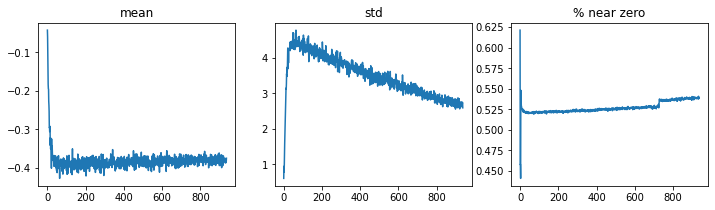

In [19]:
learn.activation_stats.plot_layer_stats(0)

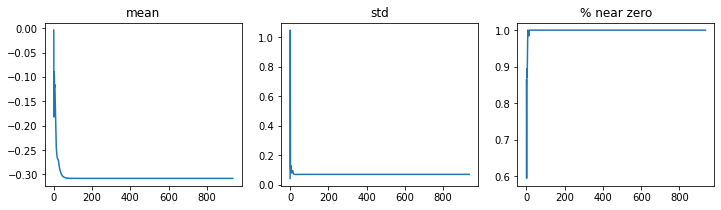

In [20]:
learn.activation_stats.plot_layer_stats(-2)

In [21]:
dls = get_dls(512)

In [22]:
learn = fit()

epoch,train_loss,valid_loss,accuracy,time
0,0.448915,0.303637,0.903300,00:37


In [14]:
def fit(epochs=1, lr=0.06):
    learn = Learner(dls, simple_cnn(),
                   metrics=accuracy, cbs=ActivationStats(with_hist=True))
    learn.fit_one_cycle(epochs, lr)
    return learn

In [15]:
learn = fit()

/home/debian/.local/lib/python3.9/site-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (modules) that exists in the learner. Use `self.learn.modules` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


epoch,train_loss,valid_loss,accuracy,time
0,0.178569,0.149341,0.954000,00:49


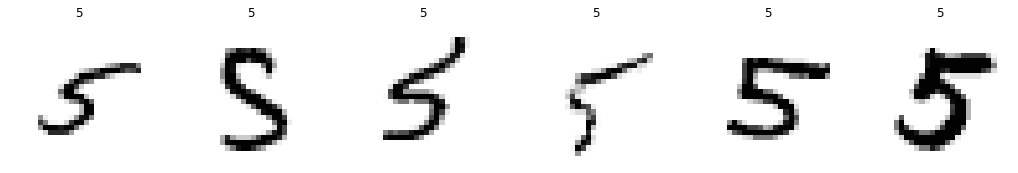

In [59]:
dls.valid.show_batch(max_n=6, nrows=1)

In [21]:
ci = ClassificationInterpretation.from_learner(learn)

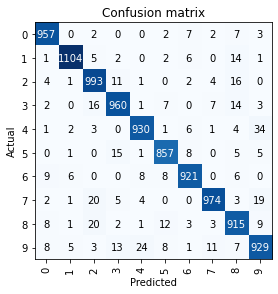

In [17]:
_.plot_confusion_matrix()

In [23]:
ci.top_losses(k=6, items=True)

(TensorBase([13.8276,  9.3062,  8.2210,  8.0672,  7.7187,  7.6076]),
 TensorBase([4210, 1191, 2829, 2583, 1709, 6890]),
 (#6) [Path('testing/3/1681.png'),Path('testing/9/2387.png'),Path('testing/1/1527.png'),Path('testing/1/2182.png'),Path('testing/9/6505.png'),Path('testing/8/4639.png')])

<Axes: >

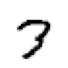

In [47]:
show_image(dls.valid.dataset[4210][0])

In [49]:
learn.predict(dls.valid.dataset[4210][0])

('7',
 tensor(7),
 tensor([5.0011e-12, 1.1181e-09, 3.5465e-08, 9.8801e-07, 8.1068e-09, 1.2180e-09, 3.2102e-13, 9.9999e-01, 1.0062e-09, 5.7384e-06]))

## Earlier work

In [10]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [11]:
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [12]:
im3_path=threes[1]
im3 = Image.open(im3_path)
im3

In [13]:
array(im3)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0

In [14]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


In [16]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

In [17]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

<Axes: >

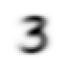

In [18]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

<Axes: >

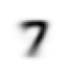

In [19]:
mean7  = stacked_sevens.mean(0)
show_image(mean7)

In [20]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(stacked_threes[1],mean3)


tensor(0.1114)

## Images with a linear NN